## Estadistica Aplicada
Seccion 17 - 27 oct 2023

Francisco Humberto Villegas Reyna 1731722 gpo43

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

In [3]:
# datos
desempleo_mex=pd.read_excel('desempleo_mex.xlsx')

In [5]:
desempleo_mex.head()

,meses,tasa de desempleo
0,2005/01,3.951998
1,2005/02,3.773302
2,2005/03,3.627075
3,2005/04,3.363412
4,2005/05,3.303693


In [6]:
desempleo_mex.dtypes

meses                 object
tasa de desempleo    float64
dtype: object

In [8]:
desempleo_mex.isnull().sum()

meses                0
tasa de desempleo    0
dtype: int64

In [9]:
## formato tiempo
## el index tiempo
## frecuencia el tiempo

desempleo_mex['meses']=pd.to_datetime(desempleo_mex['meses'], format='%Y/%m')

In [10]:
desempleo_mex.head()

,meses,tasa de desempleo
0,2005-01-01,3.951998
1,2005-02-01,3.773302
2,2005-03-01,3.627075
3,2005-04-01,3.363412
4,2005-05-01,3.303693


In [11]:
desempleo_mex=desempleo_mex.set_index('meses')

In [13]:
desempleo_mex.head()

,tasa de desempleo
meses,
2005-01-01,3.951998
2005-02-01,3.773302
2005-03-01,3.627075
2005-04-01,3.363412
2005-05-01,3.303693


In [14]:
desempleo_mex=desempleo_mex.asfreq('MS')

In [15]:
desempleo_mex.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='meses', length=224, freq='MS')

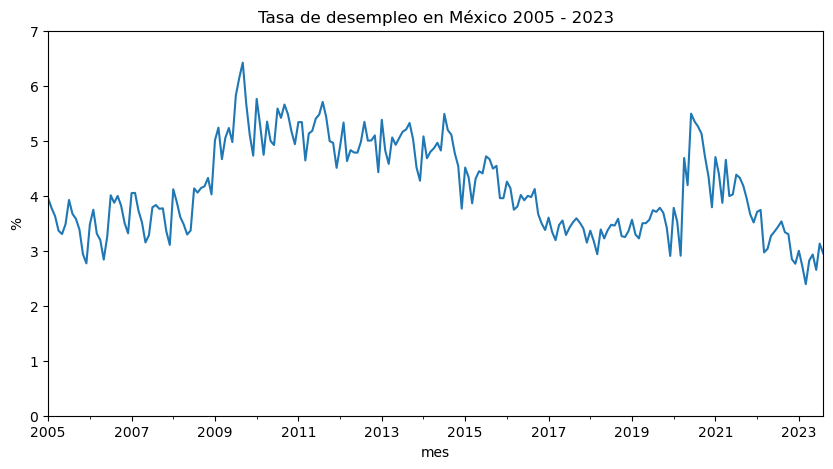

In [19]:
## graficar
desempleo_mex['tasa de desempleo'].plot(figsize=(10,5))
plt.title('Tasa de desempleo en México 2005 - 2023')
plt.ylabel('%')
plt.xlabel('mes')
plt.ylim(0,7)
plt.show();

In [20]:
## prueba de razi estacionaria
prueba_adf=adfuller(desempleo_mex['tasa de desempleo'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.25

No rechazamos $H_0$ significa que la tasa de desempleo es una serie no estacionaria

In [22]:
## 1ras diferencias
desempleo_mex['desempleo_diff']=desempleo_mex['tasa de desempleo'].diff()

<Axes: xlabel='meses'>

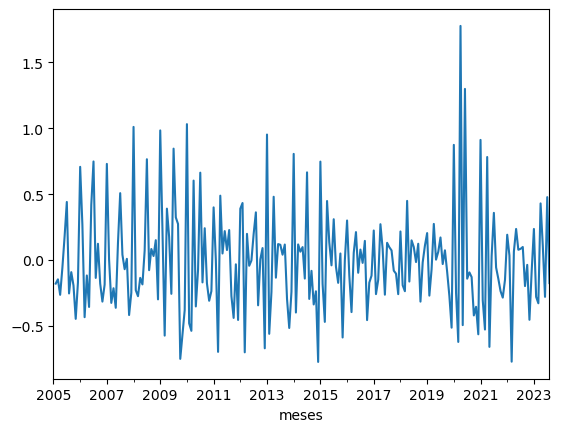

In [23]:
desempleo_mex['desempleo_diff'].plot()

In [25]:
## prueba de raiz unitaria a las 1ras diferencias
prueba_adf1=adfuller(desempleo_mex['desempleo_diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)


0.01

Rechazamos $H_0$ , Las primeras diferencias del desempleo son una serie estacionaria

* desempleo integrado I(1)
* 1ras diferencias diff integrado I(0)


Determinar el orden del proceso 

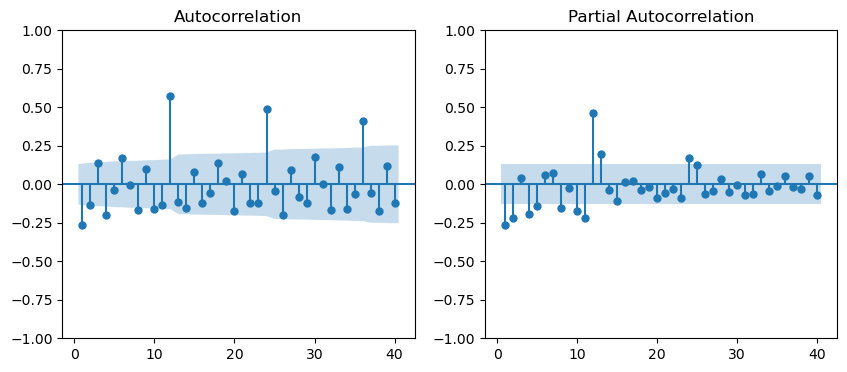

In [26]:
## graficas de autocorrelacion
ig, ax=plt.subplots(1,2,figsize=(10,4))

#1er 
plot_acf(desempleo_mex['desempleo_diff'].dropna(), zero=False, lags=40,ax=ax[0])

##2da
plot_pacf(desempleo_mex['desempleo_diff'].dropna(), zero=False, lags=40,ax=ax[1])
plt.show();

Dado el patrón repetitivo de las graficas de correlacion estamos ante una serie con componente estacional

In [27]:
## obtener el orden
pm.auto_arima(desempleo_mex['tasa de desempleo'],

              star_p=1, start_q=1, max_p=7, max_q=7,ic='aic',seasonal=True, m=12,start_P=1,start_Q=1, max_P=7, max_Q=7
              
              
              )

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

La tasa de desempleo SARIMA(1,1,0)(1,0,1,12)

In [29]:
model=ARIMA(desempleo_mex['tasa de desempleo'], order=(1,1,0), seasonal_order=(1,0,1,12))

results=model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  tasa de desempleo   No. Observations:                  224
Model:             ARIMA(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -28.306
Date:                            Fri, 27 Oct 2023   AIC                             64.613
Time:                                    15:02:45   BIC                             78.241
Sample:                                01-01-2005   HQIC                            70.115
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3689      0.061     -6.075      0.000      -0.488      -0.250
ar.S.L12       0.9763      0.014   

In [30]:
desempleo_mex['sarima']=results.predict()

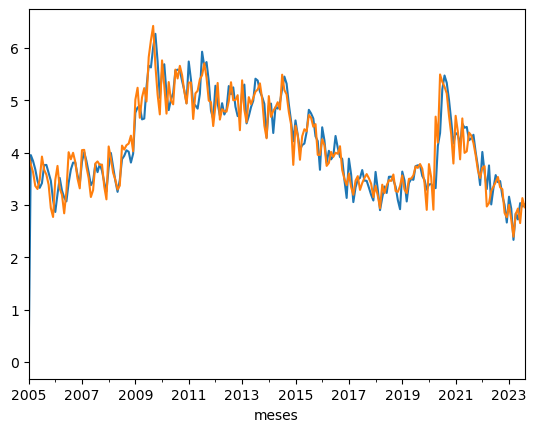

In [32]:
desempleo_mex['sarima'].plot()
desempleo_mex['tasa de desempleo'].plot()
plt.show();

In [33]:
desempleo_mex.tail()

,tasa de desempleo,desempleo_diff,sarima
meses,,,
2023-04-01,2.822799,0.430258,2.837606
2023-05-01,2.931125,0.108327,2.722100
2023-06-01,2.652033,-0.279093,3.034390
2023-07-01,3.129870,0.477837,2.968333
2023-08-01,2.955346,-0.174524,3.007015


<Axes: xlabel='meses'>

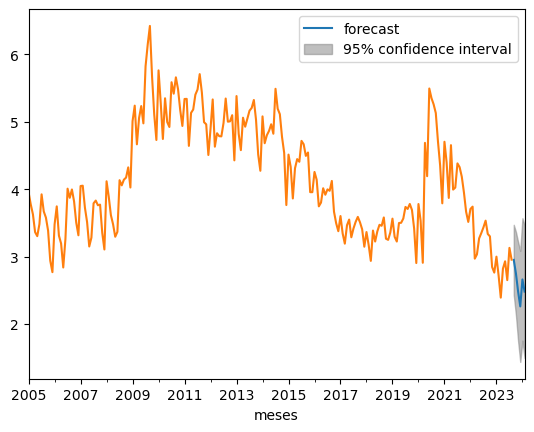

In [34]:
plot_predict(results,start='2023-09-01', end='2024-02-01')
desempleo_mex['tasa de desempleo'].plot()

In [35]:
forecast=results.get_forecast(steps=6)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()


In [36]:
inicio='2023-09-01'
fin='2024-02-01'

In [37]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intevalos=forecast_ci.loc[inicio:fin]

In [38]:
pronostico_valor

2023-09-01    2.951736
2023-10-01    2.750669
2023-11-01    2.483561
2023-12-01    2.262441
2024-01-01    2.661989
2024-02-01    2.481789
Freq: MS, Name: predicted_mean, dtype: float64

In [39]:
pronostico_intevalos

,lower tasa de desempleo,upper tasa de desempleo
2023-09-01,2.431389,3.472082
2023-10-01,2.135374,3.365963
2023-11-01,1.750114,3.217009
2023-12-01,1.439565,3.085316
2024-01-01,1.754471,3.569507
2024-02-01,1.498252,3.465325


In [40]:
df_pronostico=pd.DataFrame({
    'pronostico':pronostico_valor,
    'limite inferior': pronostico_intevalos['lower tasa de desempleo'],
    'limite superior':pronostico_intevalos['upper tasa de desempleo']
})

In [41]:
df_pronostico

,pronostico,limite inferior,limite superior
2023-09-01,2.951736,2.431389,3.472082
2023-10-01,2.750669,2.135374,3.365963
2023-11-01,2.483561,1.750114,3.217009
2023-12-01,2.262441,1.439565,3.085316
2024-01-01,2.661989,1.754471,3.569507
2024-02-01,2.481789,1.498252,3.465325


In [48]:
print(f'para septiembre de 2023 pronosticamos una tasa de desempleo',df_pronostico['pronostico'][0].round(2),'%', 'pero puede estar entre',df_pronostico['limite inferior'][0].round(2),'% y',df_pronostico['limite superior'][0].round(2),'%')

para septiembre de 2023 pronosticamos una tasa de desempleo 2.95 % pero puede estar entre 2.43 % y 3.47 %


## Pronostico del Euro

In [49]:
## datos 
euro=pd.read_excel('euro_mxn.xlsx')

In [50]:
euro.dtypes

Date         datetime64[ns]
tipo_euro           float64
dtype: object

In [51]:
euro=euro.rename(columns={'Date':'Semana'})

In [53]:
euro.head()

,Semana,tipo_euro
0,2018-10-29,23.002001
1,2018-11-05,22.935900
2,2018-11-12,22.970230
3,2018-11-19,23.150999
4,2018-11-26,23.081200


In [55]:
euro.isnull().sum()

Semana       0
tipo_euro    0
dtype: int64

In [57]:
### hacerlo en index
euro=euro.set_index('Semana')

In [58]:
euro.head()

,tipo_euro
Semana,
2018-10-29,23.002001
2018-11-05,22.935900
2018-11-12,22.970230
2018-11-19,23.150999
2018-11-26,23.081200


In [60]:
## asginar la frecuencia
euro=euro.asfreq('W-MON')

In [61]:
euro.head()

,tipo_euro
Semana,
2018-10-29,23.002001
2018-11-05,22.935900
2018-11-12,22.970230
2018-11-19,23.150999
2018-11-26,23.081200


<Axes: xlabel='Semana'>

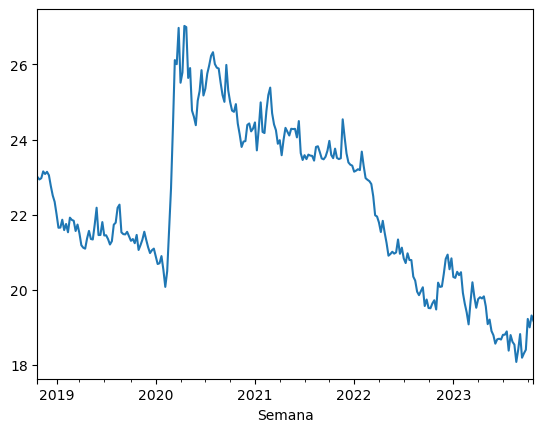

In [62]:
## grafica la serie
euro['tipo_euro'].plot()

In [63]:
## prueba de raiz unitaria
prueba_adf=adfuller(euro['tipo_euro'])
pvalue=prueba_adf[1]
pvalue.round(2)


0.69

No rechazamos $h_0$, significa que el tipo del euro es una serie no estacionaria

In [64]:
##1ras diferencias 
euro['euro_diff']=euro['tipo_euro'].diff()

<Axes: xlabel='Semana'>

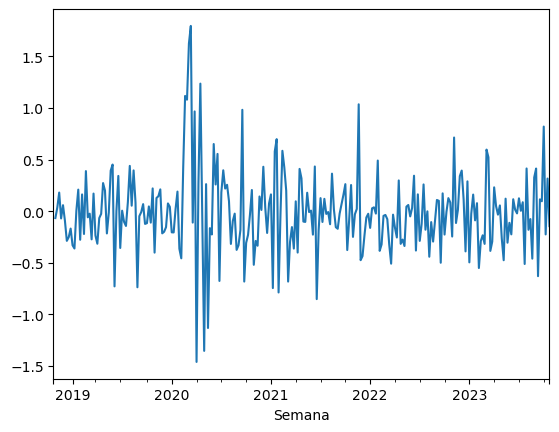

In [65]:
euro['euro_diff'].plot()

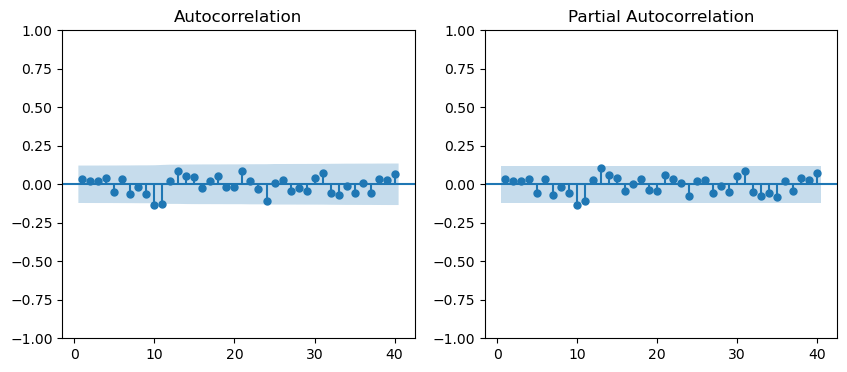

In [66]:
## graficas de correlacion 
ig, ax=plt.subplots(1,2,figsize=(10,4))

##1er 
plot_acf(euro['euro_diff'].dropna(), zero=False, lags=40, ax=ax[0])

##2do
plot_pacf(euro['euro_diff'].dropna(), zero=False, lags=40, ax=ax[1])
plt.show();

Dado que no hay un patron repetitivo en las graficas de correlacion , el tipo de cambio euro-peso es una serie sin componente estacional

In [68]:
##dterminar orden ARIMA 

pm.auto_arima(euro['euro_diff'].dropna(), 
          star_p=1, start_q=1, max_p=7, max_q=7,ic='aic',seasonal=False    
              )

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

Limitacion del enfoque ARIMA los ARIMA (0,1,0)=ARMA(0,0)=Ruido Blanco no se puede pronosticar 

In [70]:
model=ARIMA(euro['tipo_euro'], order=(2,1,0) )
results=model.fit()

In [71]:
euro['arima_fake']=results.predict()

<Axes: xlabel='Semana'>

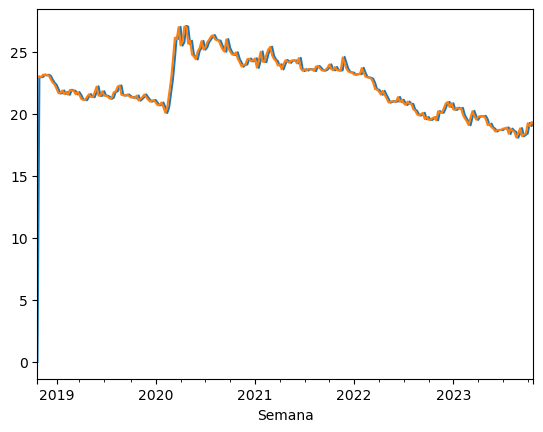

In [73]:
euro['arima_fake'].plot()
euro['tipo_euro'].plot()

In [75]:
forecast=results.get_forecast(steps=4)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [79]:
inicio='2023-10-30'
fin='2023-11-20'

In [80]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intevalos=forecast_ci.loc[inicio:fin]

In [82]:
euro_promo=pd.DataFrame({
    'pronostico':pronostico_valor,
    'limite inferior':pronostico_intevalos['lower tipo_euro'],
    'limite superior':pronostico_intevalos['upper tipo_euro']
})

In [83]:
euro_promo

,pronostico,limite inferior,limite superior
2023-10-30,19.173375,18.405445,19.941306
2023-11-06,19.170443,18.065121,20.275765
2023-11-13,19.170370,17.798932,20.541809
2023-11-20,19.170307,17.575996,20.764618


In [89]:
print(f'El tipo de cambio euro-peso para la semana del del 30 de octubre del 2023 pronosticamos un tipo de cambio de $',euro_promo['pronostico'][0].round(2),', pero puede estar entre $',euro_promo['limite inferior'][0].round(2),' y $', euro_promo['limite superior'][0].round(2))

El tipo de cambio euro-peso para la semana del del 30 de octubre del 2023 pronosticamos un tipo de cambio de $ 19.17 , pero puede estar entre $ 18.41  y $ 19.94
